# Regression - MPG Prediction

#### Objective
This is a part of the PolyU AI prjoect which is a comparative studies of the chosen ML algorithms. 
This notebook compares the effectiveness of the algorithms on the MPG dataset.

### TOC
- Data Exploration 
- Data Processing
    - missing value
    - data type
    - outliner
    - train test split

- Models
    - kNN Regressor
    - Linear Regression
    - Gradient Boosting Decision Tree (GBDT)
    - NN

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from scipy.stats import norm
from scipy import stats

In [25]:
dataset_path = './dataset/mpg/auto-mpg.data'

In [26]:
# raw = pd.read_csv(data_path)
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

## Data Exploration

In [27]:
print(dataset.head())
print("\n")
print(dataset.shape)
print("\n")
print(dataset.describe())

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


(398, 8)


              MPG   Cylinders  Displacement  Horsepower       Weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.7500

Skewness: 0.457066
Kurtosis: -0.510781


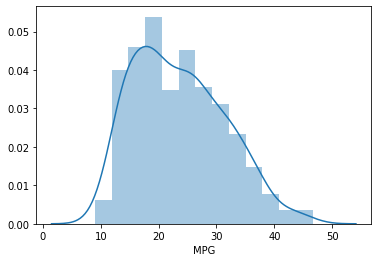

In [28]:
# Kernel Density Estimation (estimating the pdf)
sns.distplot(dataset['MPG'])

print("Skewness: %f" % dataset['MPG'].skew())
print("Kurtosis: %f" % dataset['MPG'].kurt())

## Data Processing

In [29]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [30]:
dataset = dataset.dropna()
print(dataset.shape)

(392, 8)


In [31]:
dataset.Origin.unique()

array([1, 3, 2])

In [32]:
for col in dataset.columns:
    print("Unique values of {}: {} \n".format(col, getattr(dataset, col).unique()))

Unique values of MPG: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 33.8 32.7 23.7 32.4 26.6 25.8 23.5 39.1 39.  35.1
 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4 34.  38.
 44. ] 

Unique values of Cylinders: [8 4 6 3 5] 

Unique values of Displacement: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
 232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.   91.
  97.5  70.  120.   96.   98.  108.  155.  

In [33]:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [34]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [35]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [36]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [37]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,-0.465148,-0.495225,0.774676
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,-0.465148,-0.495225,0.774676
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,-0.465148,-0.495225,0.774676
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,-0.465148,-0.495225,0.774676
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-0.465148,2.012852,-1.286751


## Models

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import mean_squared_error
from math import sqrt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)


2.0.0


In [39]:
rmse = lambda y, y_hat: sqrt(mean_squared_error(y, y_hat))
kfold = KFold(n_splits=20, random_state= 0, shuffle = True)
losses = {}

### kNN

In [40]:
kNN = KNeighborsRegressor()

kNN_grid = {
    'n_neighbors': list(range(3,15))
}

kNN_CV = GridSearchCV(kNN, param_grid = kNN_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1, verbose = 1)
kNN_CV.fit(normed_train_data, train_labels)
kNN_best = kNN_CV.best_estimator_
print(kNN_best)
knn_rmse = rmse(test_labels,kNN_best.predict(normed_test_data))
losses['kNN'] = knn_rmse

Fitting 20 folds for each of 12 candidates, totalling 240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.6s finished
/Users/garychan/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Linear Regression

In [41]:
LR = LinearRegression()
LR.fit(normed_train_data, train_labels)
print('R^2:',LR.score(normed_train_data, train_labels))
print('W:', LR.coef_)
print('b:', LR.intercept_)
LR_rmse = rmse(test_labels,LR.predict(normed_test_data))
losses['Linear Regression'] = LR_rmse

R^2: 0.8162658991904448
W: [-0.78841004  2.40713021 -1.35496092 -5.11799964 -0.26503539  2.92538885
  0.42739869  0.5746115  -0.8100885 ]
b: 23.310509554140125


### GBDT

In [42]:
gbt = GradientBoostingRegressor()

xg_param_grid = {
              'n_estimators' :[100,200,300],
              'max_depth': list(range(3,len(normed_train_data.columns)+1)),
              }

gsgbt = GridSearchCV(gbt,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsgbt.fit(normed_train_data, train_labels)
gbt_best = gsgbt.best_estimator_
gbt_rmse = rmse(test_labels,gbt_best.predict(normed_test_data))
losses['GBDT'] = gbt_rmse

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
Fitting 20 folds for each of 21 candidates, totalling 420 fits
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    7.3s finished
/Users/garychan/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
gbt_best

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### NN

In [44]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [45]:
model = build_model()

EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop])

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

losses['NN'] = sqrt(mse)

78/78 - 0s - loss: 6.2566 - mae: 1.8991 - mse: 6.2566


### Plot  the loss

In [46]:
losses_df = pd.DataFrame(losses.items(), columns=['model', 'RMSE']).sort_values('model')

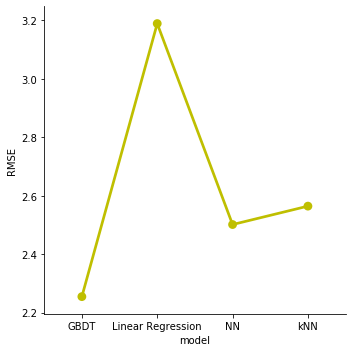

In [47]:
sns.catplot(x="model", y="RMSE", kind="point", color='y', data=losses_df);